## Homework 3
### Part 1: Imbalanced Dataset

- In this homework, you will be working with an imbalanced Dataset.
- The dataset is Credit Card Fraud Detection dataset which was hosted on Kaggle.
- The aim is to detect fraudlent transactions.

### Instructions

1) Please push the .ipynb and .pdf to Github Classroom prior to the deadline, .py file is optional (not needed).<br>
2) Please include your Name and UNI below.

### Name: Kaiyan Xu
### UNI: kx2198

### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Feel free to import any other packages you need
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

### **Data Preprocessing and Exploration**.
- Download the Kaggle Credit Card Fraud data set.<br>
- Features V1, V2, … V27, V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.<br>
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. <br>
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.<br>
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### **Examining the class Imbalance**
**1.1 How many observations are in this dataset? How many are positive and negative?** <br>
(Note: Positive labels are labeled as 1)

In [4]:
# Your Code Here
raw_df.shape

(284807, 31)

There are 284807 observations.

In [5]:
raw_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

There are 284315 class 0, and 492 class 1.

#### **1.2 Cleaning and normalizing the data**
The raw data has a few issues. <br>
Since we are unsure what the time column actually means so drop the Time column.
The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range. <br>

The below is already done for you.

In [6]:
cleaned_df = raw_df.copy()

# You don't want the 'Time' column. Pop it off
cleaned_df.pop('Time')

# The 'Amount' column covers a huge range. Convert it to log-space.
eps = 0.001
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount') + eps)

In [7]:
cleaned_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008105
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989913
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936641
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816249
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.260067
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,3.210481
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,4.217756
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,2.302685


**1.2.1 Split the dataset into development and test sets. Set test size as 20% and random state as 42. Print the shape of your development and test features**

In [8]:
df_X = cleaned_df.drop(columns=['Class'])
df_Y = cleaned_df['Class'].astype(int)

In [9]:
# Your Code Here
X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_Y, train_size = 0.8, random_state = 42, stratify = df_Y)

In [10]:
print('shape of X_dev: ', X_dev.shape)
print('shape of X_test: ', X_test.shape)
print('shape of y_dev: ', y_dev.shape)
print('shape of y_test: ', y_test.shape)

shape of X_dev:  (227845, 29)
shape of X_test:  (56962, 29)
shape of y_dev:  (227845,)
shape of y_test:  (56962,)


**1.2.2 Normalize the features using Standard Scaler from Sklearn.**

In [11]:
# Your Code Here
scaler = StandardScaler()
X_dev_nor = scaler.fit_transform(X_dev)
X_test_nor = scaler.transform(X_test)

### **Default Baseline**
**1.3.1 First, let us fit a default Decision tree classifier (use max_depth=10 and random_state=42). Print the AUC and Average Precision values of 5 Fold Cross Validation**

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score, average_precision_score

In [13]:
def DT_cv():
    scores = cross_validate(DecisionTreeClassifier(max_depth=10, random_state=42),
                            X_dev_nor, y_dev, cv = 5,
                            scoring = ['roc_auc', 'average_precision'])

    auc_scores = scores['test_roc_auc'].mean()
    ap_scores= scores['test_average_precision'].mean()
    print(f"Average AUC: {auc_scores}")
    print(f"Average 5-fold AP: {ap_scores}")

DT_cv()

Average AUC: 0.8359524571279693
Average 5-fold AP: 0.641744070059615


### **Random Oversampling**
**1.3.2 Perform random oversampling on the development dataset.**

*   How many positive and negative labels do you observe after random oversampling?
*   What is the shape of your development dataset?

(Note: Set random state as 42 when performing oversampling)

In [14]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [15]:
# Your Code Here
ros = RandomOverSampler(random_state=42)
X_dev_oversample, y_dev_oversample = ros.fit_resample(X_dev_nor, y_dev)
print(X_dev_oversample.shape)
print(y_dev_oversample.value_counts())

(454902, 29)
0    227451
1    227451
Name: Class, dtype: int64


227451 positive and negative labels.
Shape of development set is 454902*29

**1.3.3 Repeat 1.3.1 using the dataset you created in the above step (1.3.2 Random oversampling). <br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation) <br>
This will help us to compare the models.**

In [16]:
# Your Code Here
def DT_ros():
    scores = cross_validate(DecisionTreeClassifier(max_depth=10, random_state=42),
                            X_dev_oversample, y_dev_oversample, cv = 5,
                            scoring = ['roc_auc', 'average_precision'])

    auc_scores = scores['test_roc_auc'].mean()
    ap_scores= scores['test_average_precision'].mean()
    print(f"Average AUC: {auc_scores}")
    print(f"Average 5-fold AP: {ap_scores}")

DT_ros()

Average AUC: 0.9991528810903473
Average 5-fold AP: 0.9985380738652964


### **Random Undersampling**
**1.3.4 Perform Random undersampling on the development dataset.**

- How many positive and negative labels do you observe after random undersampling?
- What is the shape of your development dataset?

(Note: Set random state as 42 when performing undersampling)

In [17]:
# Your Code Here
rus = RandomUnderSampler(random_state=42, replacement = False)
X_dev_subsample, y_dev_subsample = rus.fit_resample(X_dev_nor, y_dev)
print(X_dev_subsample.shape)
print(y_dev_subsample.value_counts())

(788, 29)
0    394
1    394
Name: Class, dtype: int64


394 positive and negative labels.
Shape of development set is 788*29.

**1.3.5 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 Random undersampling).<br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation)<br>
This will help us to compare the models**

In [18]:
# Your Code Here
def DT_rus():
    scores = cross_validate(DecisionTreeClassifier(max_depth=10, random_state=42),
                            X_dev_subsample, y_dev_subsample, cv = 5,
                            scoring = ['roc_auc', 'average_precision'])

    auc_scores = scores['test_roc_auc'].mean()
    ap_scores= scores['test_average_precision'].mean()
    print(f"Average AUC: {auc_scores}")
    print(f"Average 5-fold AP: {ap_scores}")

DT_rus()

Average AUC: 0.9303029182535673
Average 5-fold AP: 0.9022723811037444


### **SMOTE**
**1.3.6 Perform Synthetic Minority Oversampling Technique (SMOTE) on the development dataset**

- How many positive and negative labels do you observe after performing SMOTE?
- What is the shape of your development dataset?

(Note: Set random state as 42 when performing SMOTE)

In [19]:
# Your Code Here
smote = SMOTE(random_state = 42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev_nor, y_dev)
print(X_dev_smote.shape)
print(y_dev_smote.value_counts())

(454902, 29)
0    227451
1    227451
Name: Class, dtype: int64


**1.3.7 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 SMOTE).<br>(Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10, random_state=42 and 5 Fold Cross Validation)<br>
This will help us to compare the models**

In [20]:
# Your Code Here
def DT_smote():
    scores = cross_validate(DecisionTreeClassifier(max_depth=10, random_state=42),
                            X_dev_smote, y_dev_smote, cv = 5,
                            scoring = ['roc_auc', 'average_precision'])

    auc_scores = scores['test_roc_auc'].mean()
    ap_scores= scores['test_average_precision'].mean()
    print(f"Average AUC: {auc_scores}")
    print(f"Average 5-fold AP: {ap_scores}")

DT_smote()

Average AUC: 0.9974175030591891
Average 5-fold AP: 0.9964575330041552


### **Balanced Weight**

**1.3.8 Train a balanced default Decision tree classifier. <br> [ use max_depth=10 and random_state=42 and balance the class weights with 5 Fold Cross Validation ] <br>
Print the AUC and average precision on dev set**

In [21]:
# Your Code Here
def DT_balancedW():
    scores = cross_validate(DecisionTreeClassifier(max_depth=10, random_state=42, class_weight = 'balanced'),
                            X_dev_nor, y_dev, cv = 5,
                            scoring = ['roc_auc', 'average_precision'])

    auc_scores = scores['test_roc_auc'].mean()
    ap_scores= scores['test_average_precision'].mean()
    print(f"Average AUC: {auc_scores}")
    print(f"Average 5-fold AP: {ap_scores}")

DT_balancedW()

Average AUC: 0.905514887383234
Average 5-fold AP: 0.5236357414975382


### **Model Prediction & Evaluation**
**1.4.1 Make predictions on the test set using the five models that you built and report their AUC values.**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

In [22]:
# Your Code Here
# Default
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_dev_nor, y_dev)
y_pred = dt.predict_proba(X_test_nor)[:, 1]
print(f"AUC of default baseline: {roc_auc_score(y_test, y_pred)}")

dt_oversample = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_oversample.fit(X_dev_oversample, y_dev_oversample)
y_pred_oversample = dt_oversample.predict_proba(X_test_nor)[:, 1]
print(f"AUC of Random Oversampling: {roc_auc_score(y_test, y_pred_oversample)}")

dt_undersample = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_undersample.fit(X_dev_subsample, y_dev_subsample)
y_pred_undersample = dt_undersample.predict_proba(X_test_nor)[:, 1]
print(f"AUC of Random Undersampling: {roc_auc_score(y_test, y_pred_undersample)}")

dt_smote = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_smote.fit(X_dev_smote, y_dev_smote)
y_pred_smote = dt_smote.predict_proba(X_test_nor)[:, 1]
print(f"AUC of SMOTE: {roc_auc_score(y_test, y_pred_smote)}")

dt_balancedW = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight = 'balanced')
dt_balancedW.fit(X_dev_nor, y_dev)
y_pred_balancedW = dt_balancedW.predict_proba(X_test_nor)[:, 1]
print(f"AUC of Balanced Weight: {roc_auc_score(y_test, y_pred_balancedW)}")

AUC of default baseline: 0.8196316775866227
AUC of Random Oversampling: 0.9016732009348478
AUC of Random Undersampling: 0.8959979162599198
AUC of SMOTE: 0.8752678248423735
AUC of Balanced Weight: 0.9017402244381152


**1.4.2 Plot Confusion Matrices for all the five models on the test set. Comment your results and share your observations of the confusion matrices in detail (Explanation carries lot of points)**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [24]:
y_pred_label = dt.predict(X_test_nor)
y_pred_oversample_label = dt_oversample.predict(X_test_nor)
y_pred_undersample_label = dt_undersample.predict(X_test_nor)
y_pred_smote_label = dt_smote.predict(X_test_nor)
y_pred_balancedW_label = dt_balancedW.predict(X_test_nor)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56876
           1       0.76      0.86      0.80        86

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962



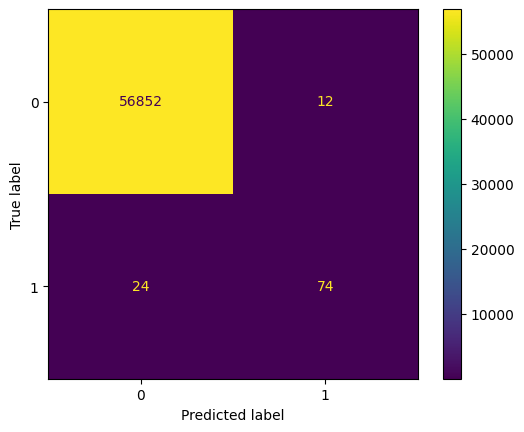

In [25]:
# Your Code Here
cm = confusion_matrix(y_test, y_pred_label, labels=dt.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_).plot()
print(classification_report(y_pred_label, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     56345
           1       0.81      0.13      0.22       617

    accuracy                           0.99     56962
   macro avg       0.90      0.56      0.61     56962
weighted avg       0.99      0.99      0.99     56962



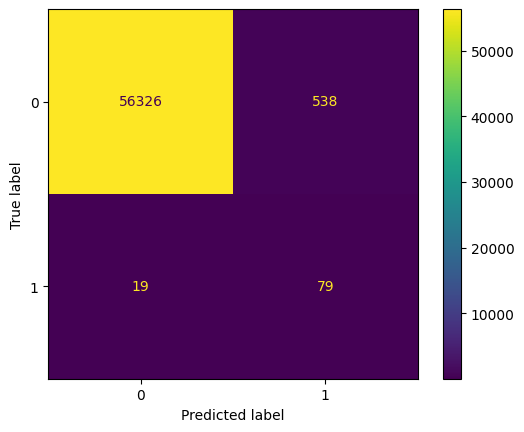

In [26]:
# Random Oversampling
cm_oversample = confusion_matrix(y_test, y_pred_oversample_label, labels=dt.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_oversample, display_labels=dt.classes_).plot()
print(classification_report(y_pred_oversample_label, y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     52367
           1       0.91      0.02      0.04      4595

    accuracy                           0.92     56962
   macro avg       0.91      0.51      0.50     56962
weighted avg       0.92      0.92      0.88     56962



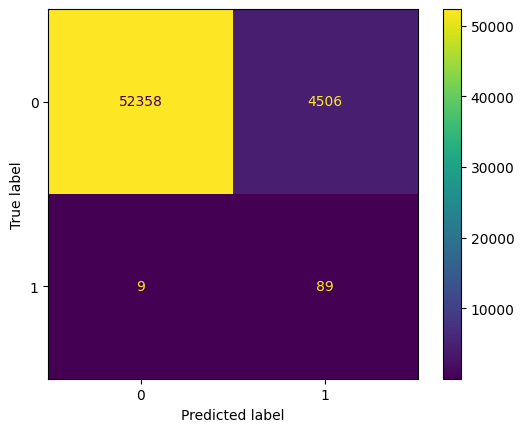

In [27]:
# Random Undersampling
cm_undersample = confusion_matrix(y_test, y_pred_undersample_label, labels=dt.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_undersample, display_labels=dt.classes_).plot()
print(classification_report(y_pred_undersample_label, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     56049
           1       0.83      0.09      0.16       913

    accuracy                           0.99     56962
   macro avg       0.91      0.54      0.58     56962
weighted avg       0.98      0.99      0.98     56962



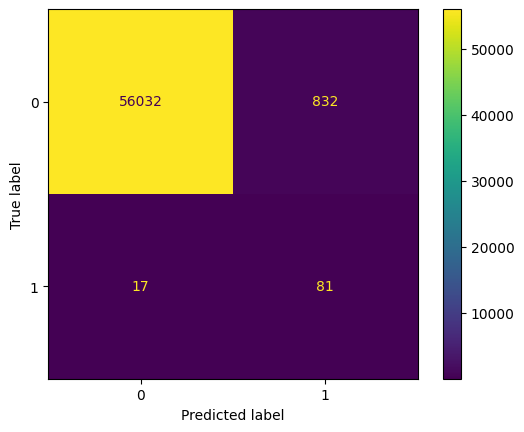

In [28]:
# SMOTE
cm_smote = confusion_matrix(y_test, y_pred_smote_label, labels=dt.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=dt.classes_).plot()
print(classification_report(y_pred_smote_label, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     56376
           1       0.81      0.13      0.23       586

    accuracy                           0.99     56962
   macro avg       0.90      0.57      0.61     56962
weighted avg       0.99      0.99      0.99     56962



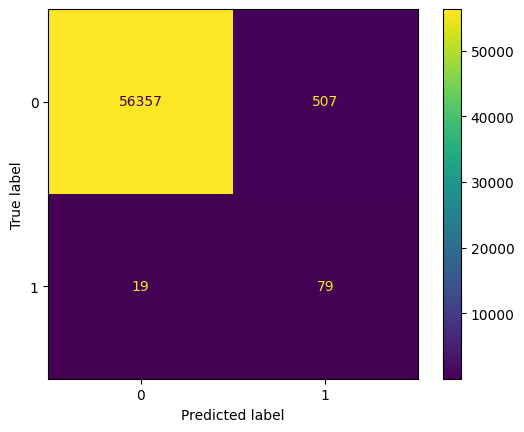

In [29]:
# Balanced Weight
cm_balancedW = confusion_matrix(y_test, y_pred_balancedW_label, labels=dt.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_balancedW, display_labels=dt.classes_).plot()
print(classification_report(y_pred_balancedW_label, y_test))

In the confusion matrix, recall of 1 (minority group) should be focused as the most important metrics because the cost of false negative is high in this cost, i.e. missing those who are real fraud incurs huge risk and implications. Therefore, I would be cautious, rather misdiagose some transactions as fraud for further confirmation, than miss real fruad transaction.

To compare the recall of fraud transaction, default has recall 0.86, oversampling has 0.12, undersampling has 0.02, smote has 0.09, balanced weight has 0.13. Therefore, both techniques that aims to improve prediction of minority group have lower recall due to overfitting.

Besides recall, precision of minority group increases after using these techniques. This also reflects precision and recall tradeoffs because the model can set threshold to assign 1 depending on its confidence. To increase recall, it should set lower threshold so more data can be assigned to fraud transactions.

**1.4.3 Plot ROC for all the five models on the test set in a single plot. Make sure you label axes and legend properly. Comment on your results and share your observations in detail (Explanation carries lot of points)**<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight)

In [30]:
from sklearn.metrics import roc_curve, auc

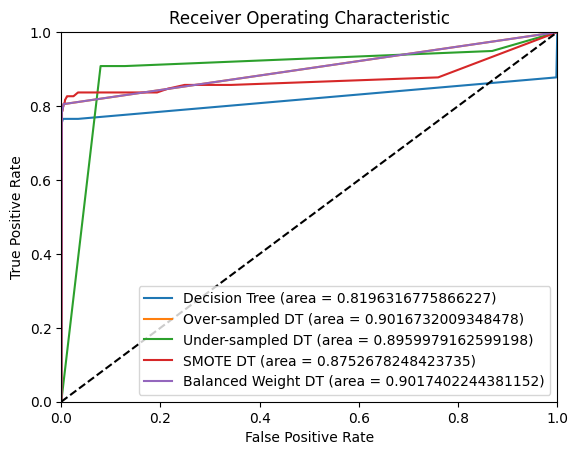

In [33]:
# Your Code Here
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_oversample, tpr_oversample, _ = roc_curve(y_test, y_pred_oversample)
roc_auc_oversample = auc(fpr_oversample, tpr_oversample)

fpr_undersample, tpr_undersample, _ = roc_curve(y_test, y_pred_undersample)
roc_auc_undersample = auc(fpr_undersample, tpr_undersample)

fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

fpr_balancedW, tpr_balancedW, _ = roc_curve(y_test, y_pred_balancedW)
roc_auc_balancedW = auc(fpr_balancedW, tpr_balancedW)

plt.figure()

plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (area = {roc_auc_dt})')
plt.plot(fpr_oversample, tpr_oversample, label=f'Over-sampled DT (area = {roc_auc_oversample})')
plt.plot(fpr_undersample, tpr_undersample, label=f'Under-sampled DT (area = {roc_auc_undersample})')
plt.plot(fpr_smote, tpr_smote, label=f'SMOTE DT (area = {roc_auc_smote})')
plt.plot(fpr_balancedW, tpr_balancedW, label=f'Balanced Weight DT (area = {roc_auc_balancedW})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()

Among all, default decision tree has lowest AUC scores and its ROC_curve least leans to the upper-left corner. This means it has higher false positive rate when true positive rate increases. Therefore, it predicts less precisely among some threshold. This also corresponds to its lowest precision of in previous confusion matrix when the threshold is 0.5. Among other models, oversampled decision tree, undersampled decision tree and decision tree with balanced weight has similar high AUS score. This means decreasing number of training data by undersampling does not influence precision a lot.

However, to evaluate if the model detects fraud transaction, average precision and recall are better than ROC curve, because average precision reflects improvement more significantly in such imbalanced data, and recall is a more direct metric by calculating the proportion of actual fraud transactions that is detected.